# **EDA on the Netflix Content Strategy**

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style("darkgrid")

# Import Data

In [2]:
!git clone "https://github.com/SagarDeshmukh24/Datasets"

fatal: destination path 'Datasets' already exists and is not an empty directory.


In [3]:
df= pd.read_csv("/content/Datasets/Netflix_Titles Dataset/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


# Data Cleaning and Transformation

In [6]:
# Filling 'director' and 'cast' columns with value 'Unknown'.
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")

In [7]:
# Filling 'country' column with value- Mode of column 'country'.
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [8]:
# Dropping missing data rows from two columns (having <0.2% missing data)  'date_added' and 'rating'.
df.dropna(subset=['date_added', 'rating'], inplace=True)

In [9]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [10]:
# Covert 'date_added' column into datetime format.
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', dayfirst= False)

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [12]:
# Creating new feature for year and month on which content is added.
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


# Analyze Insights

In [14]:
# What is the distribution of content type?
df['type'].value_counts()

,count
type,
Movie,5372
TV Show,2398


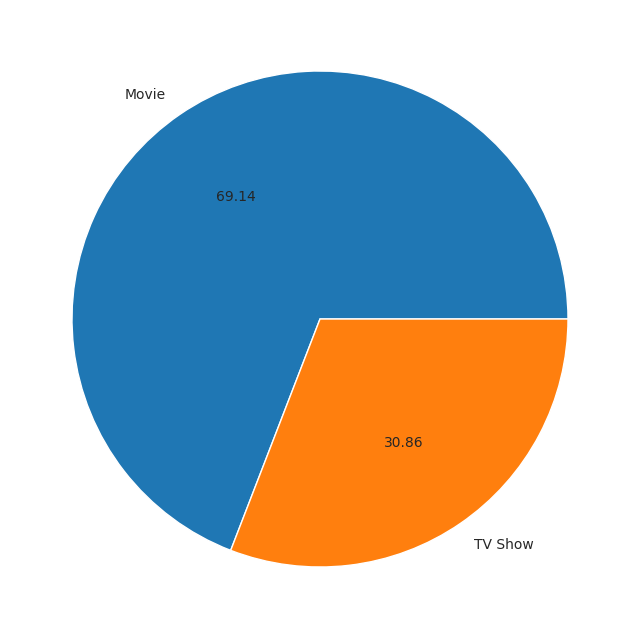

In [15]:
plt.figure(figsize=(8,10))
type_count = df['type'].value_counts()
plt.pie(type_count, labels= type_count.index, autopct= '%.2f')
plt.show()

In [16]:
# How has content been added over time?

content_added = df.groupby(['year_added','type']).size().unstack().fillna(0)
content_added

type,Movie,TV Show
year_added,,
2008,1.0,1.0
2009,2.0,0.0
2010,1.0,0.0
2011,13.0,0.0
2012,3.0,0.0
2013,6.0,5.0
2014,19.0,6.0
2015,58.0,30.0
2016,256.0,184.0


<Figure size 640x480 with 0 Axes>

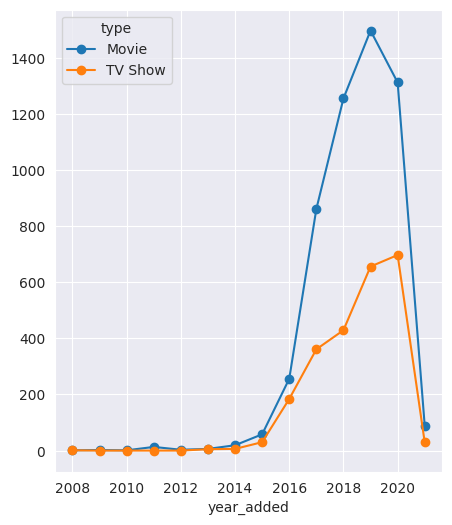

In [17]:
plt.figure()
content_added.plot(kind = "line", marker='o',figsize= (5,6))
plt.show()

#### **Theoretical Concept: Handling Multi-Value Text Columns**
The `listed_in` column contains strings with multiple genres separated by commas (e.g., "Dramas, International Movies"). To analyze each genre individually, we need to transform the data. A common technique is to:
1.  **Split** the string in each row into a list of genres.
2.  **Explode** the DataFrame so that each genre in the list gets its own row, duplicating the other information for that title.
This allows us to perform a `value_counts()` on the genres.

In [18]:
# What are the most popular genres?
splitted_list = df['listed_in'].str.split(", ").explode()
genres_count = splitted_list.value_counts().reset_index()
genres_count.insert(loc=1, column='genres', value=genres_count['listed_in'])
genres_count.drop('listed_in',axis=1,inplace=True)
genres_count.head(15)

,genres,count
0,International Movies,2437
1,Dramas,2105
2,Comedies,1471
3,International TV Shows,1197
4,Documentaries,786
5,Action & Adventure,721
6,TV Dramas,703
7,Independent Movies,673
8,Children & Family Movies,532
9,Romantic Movies,531


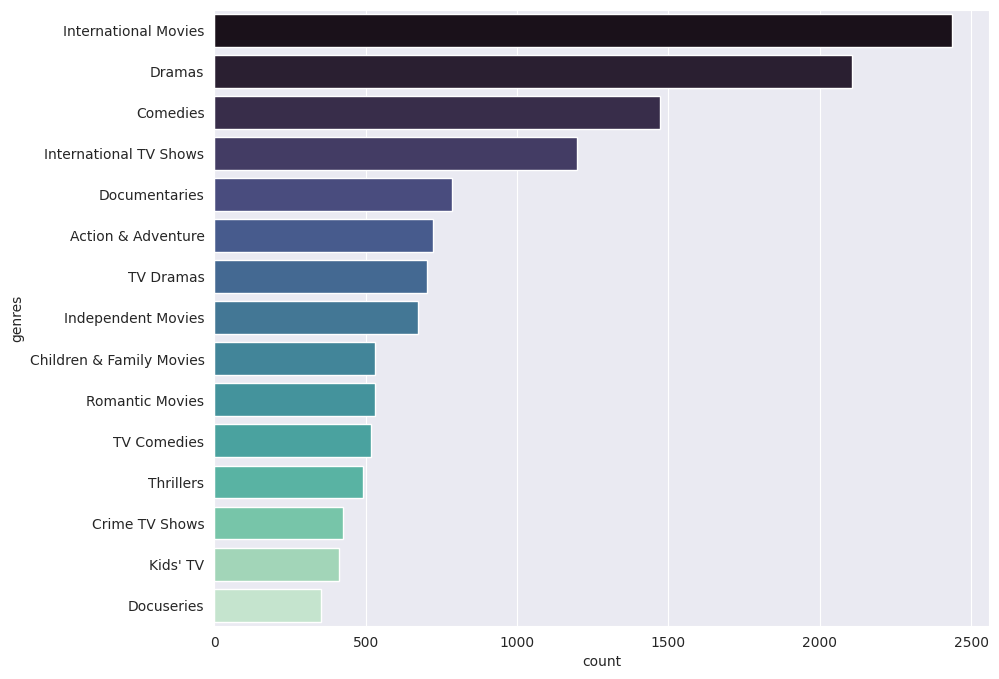

In [19]:
Top_15_genres = genres_count.head(15)

plt.figure(figsize=(10,8))
sns.barplot(x= 'count', y= 'genres',data= Top_15_genres, palette='mako', hue='genres')
plt.show()

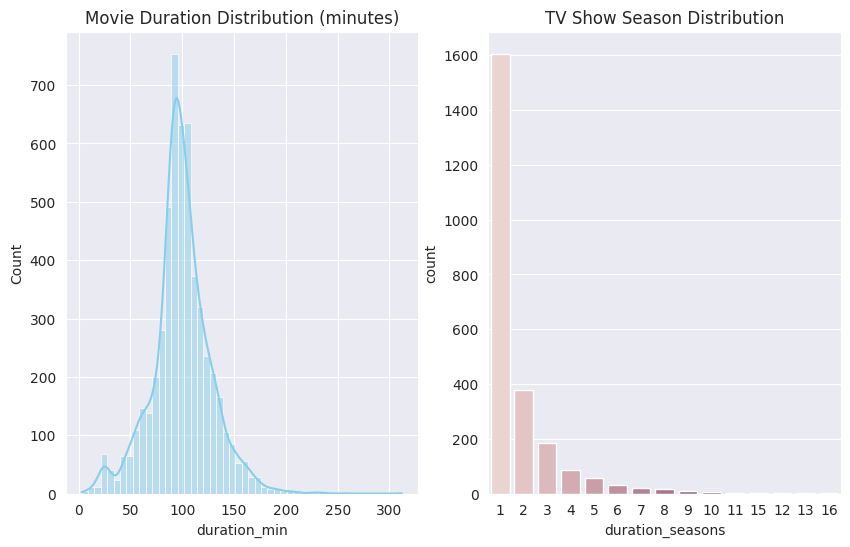

In [20]:
# What is the distribution of content duration?
df_movies = df[df['type']=='Movie'].copy()
df_tvshow = df[df['type']=='TV Show'].copy()

df_movies['duration_min'] = df_movies['duration'].str.replace(' min','').astype(int)
df_tvshow['duration_seasons'] = df_tvshow['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

fig,axes = plt.subplots(1, 2, figsize=(10,6))
sns.histplot(ax=axes[0], data=df_movies, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')
sns.countplot(ax=axes[1], x='duration_seasons', data=df_tvshow, order=df_tvshow['duration_seasons'].value_counts().index, hue='duration_seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

In [21]:
# Where does the content come from? (Geographical Analysis)
country_list = df['country'].str.split(", ").explode()
country_count = country_list.value_counts().reset_index()
country_count.insert(loc=1, column='country_name', value=country_count['country'])
country_count.drop('country',axis=1,inplace=True)
country_count.head(15)

,country_name,count
0,United States,3792
1,India,990
2,United Kingdom,721
3,Canada,412
4,France,349
5,Japan,285
6,Spain,215
7,South Korea,212
8,Germany,199
9,Mexico,154


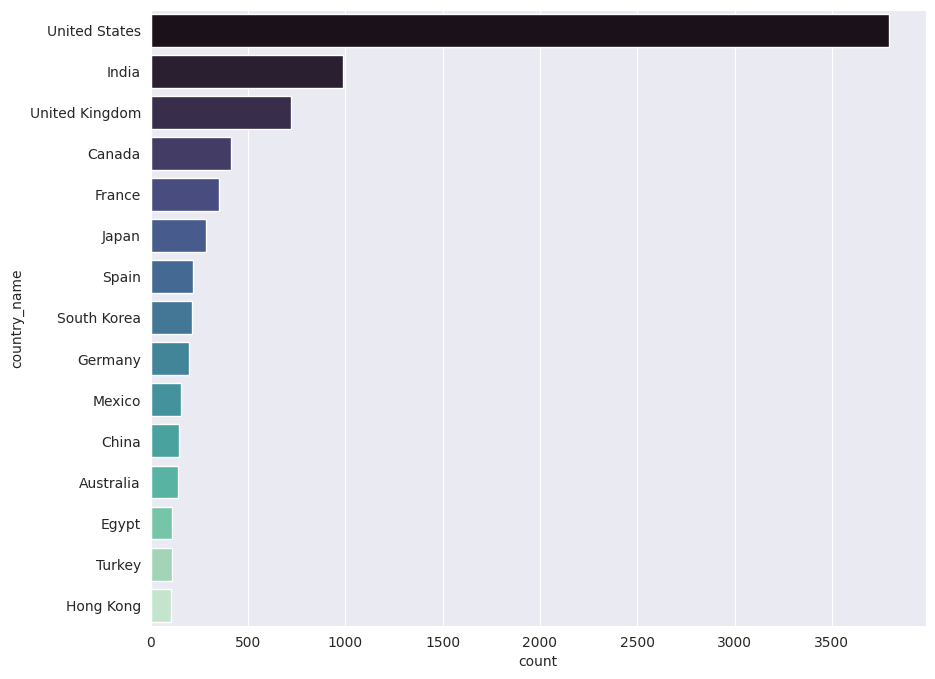

In [22]:
Top_15_countries = country_count.head(15)

plt.figure(figsize=(10,8))
sns.barplot(x= 'count', y= 'country_name',data= Top_15_countries, palette='mako', hue='country_name')
plt.show()

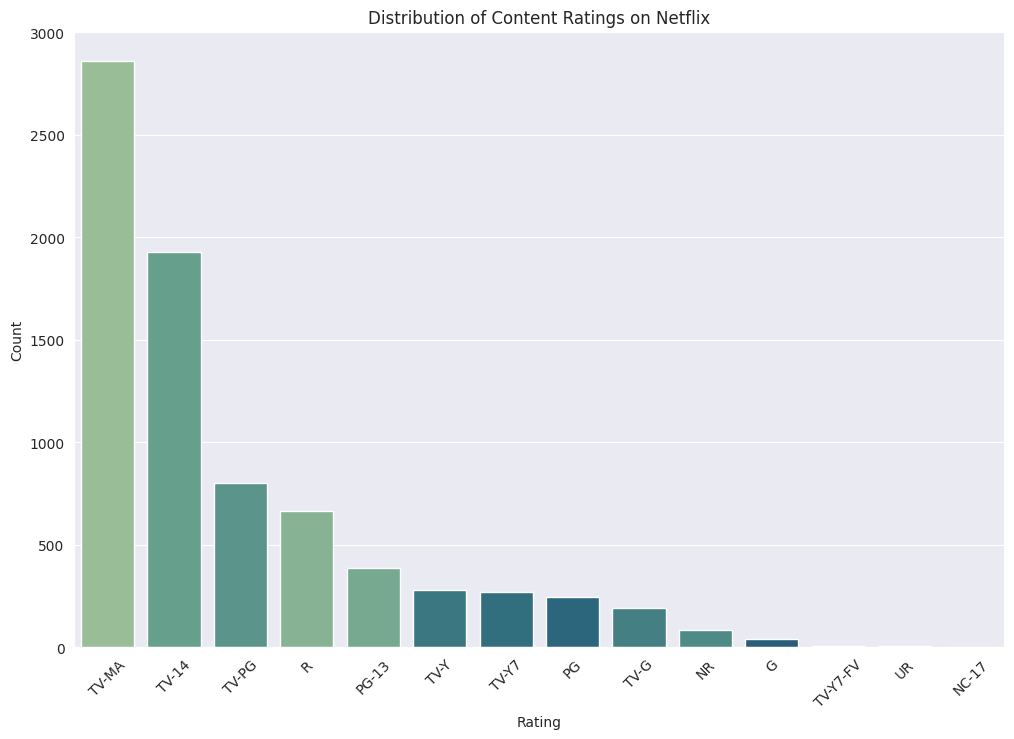

In [23]:
# What are the maturity ratings of the content?
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [24]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


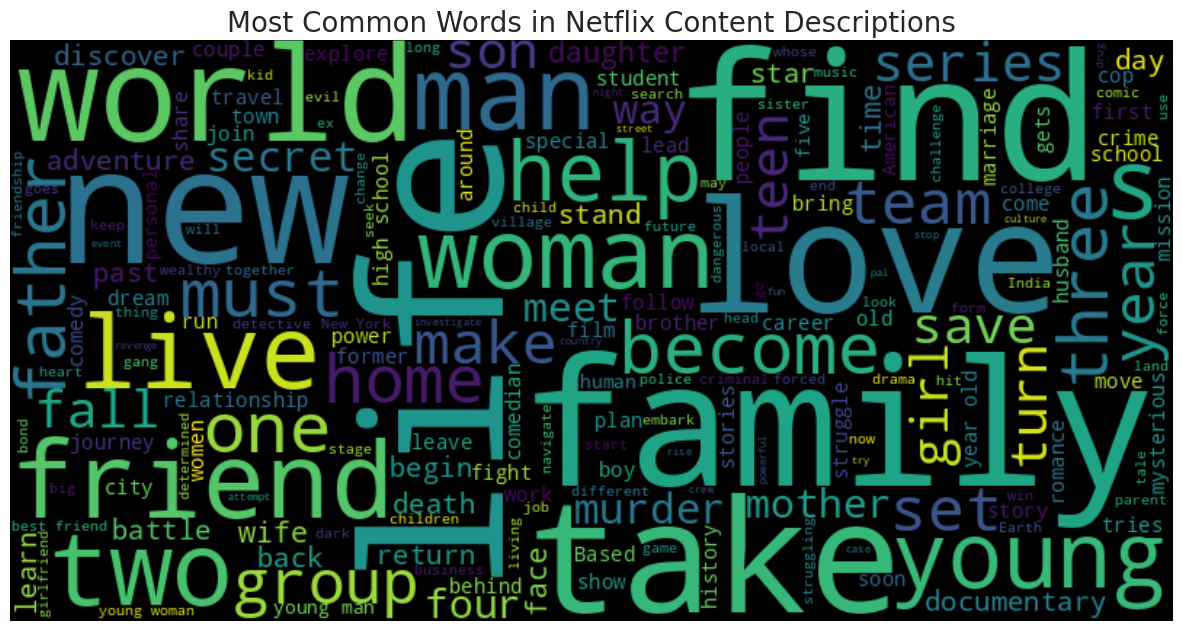

In [25]:
# Combine all descriptions into a single string
text = ' '.join(df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

# Assignment Questions

* How has the distribution of content ratings changed over time?
* Is there a relationship between content age and its type (Movie vs. TV Show)?
* Can we identify any trends in content production based on the release year vs. the year added to Netflix?
* What are the most common word pairs or phrases in content descriptions?
* Who are the top directors on Netflix?

In [26]:
# How has the distribution of content ratings changed over time?
rating_dated = df.groupby(['year_added','type']).size().unstack().fillna(0)
rating_dated

type,Movie,TV Show
year_added,,
2008,1.0,1.0
2009,2.0,0.0
2010,1.0,0.0
2011,13.0,0.0
2012,3.0,0.0
2013,6.0,5.0
2014,19.0,6.0
2015,58.0,30.0
2016,256.0,184.0


<Figure size 1200x600 with 0 Axes>

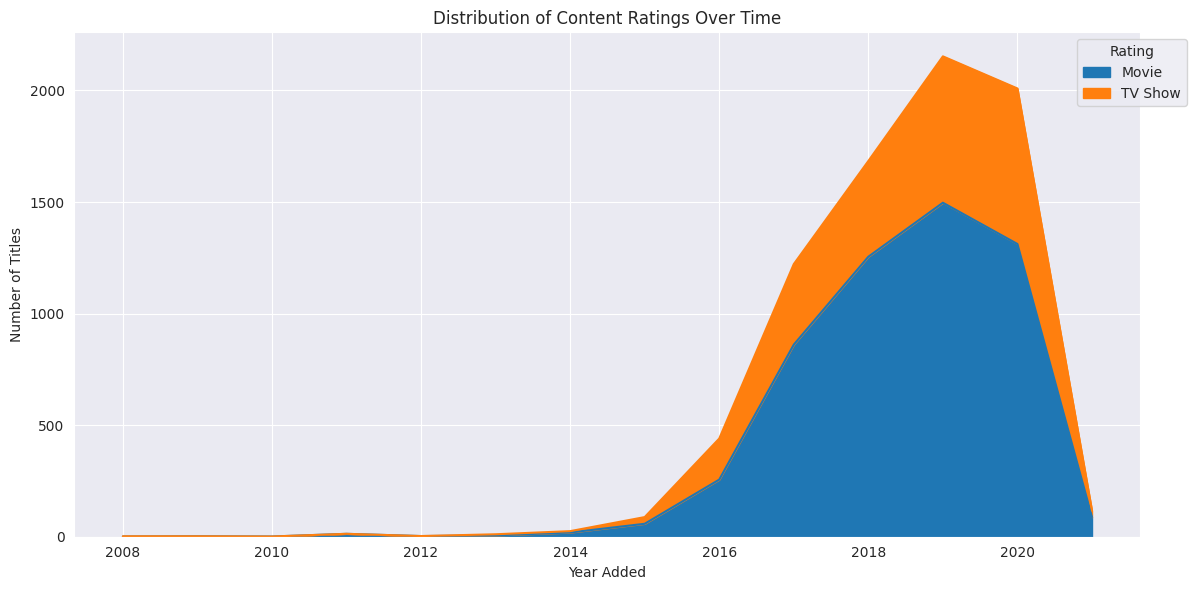

In [27]:
plt.figure(figsize=(12,6))
rating_dated.plot(kind='area', stacked=True, figsize=(12,6))
plt.title('Distribution of Content Ratings Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

**Insight-:**
- Netflix shifted from family-friendly to mature content over time

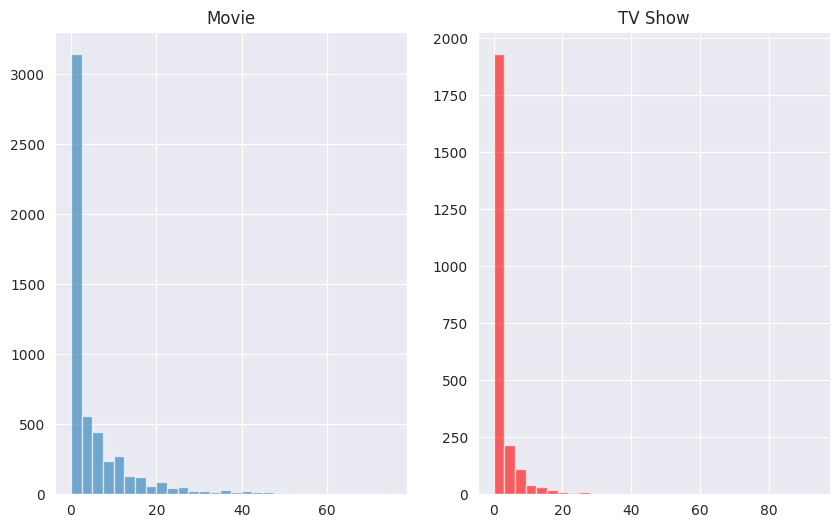

In [28]:
# Is there a relationship between content age and its type (Movie vs. TV Show)?

df['content_age'] = df['year_added'] - df['release_year']
content_age = df[df['content_age'] >= 0]

fig,axes = plt.subplots(1, 2, figsize=(10,6))
content_age[content_age['type'] == 'Movie']['content_age'].hist(ax= axes[0], alpha=0.6, bins=30).set_title("Movie")
content_age[content_age['type'] == 'TV Show']['content_age'].hist(ax= axes[1], alpha=0.6, bins=30, color= 'red').set_title("TV Show")
plt.show()

In [29]:
content_age.groupby('type')['content_age'].mean()

,content_age
type,
Movie,5.565736
TV Show,2.326214


**Insight-:**
- Movies tend to be older on average compared to TV Shows.

- TV Shows are generally more recent, with a smaller content age distribution.

- This indicates Netflix frequently licenses older movies while investing in newer TV series.

-  The narrower age spread for TV Shows suggests a continuous production pipeline.

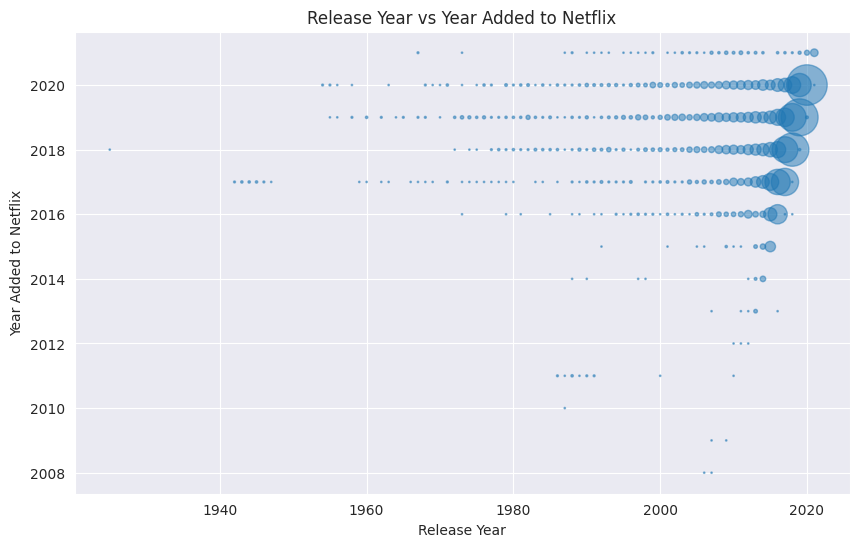

In [30]:
# Can we identify any trends in content production based on the release year vs. the year added to Netflix?
release_vs_added = (df.groupby(['year_added', 'release_year']).size().reset_index(name='count'))

plt.figure(figsize=(10,6))
plt.scatter(release_vs_added['release_year'], release_vs_added['year_added'], s=release_vs_added['count'], alpha=0.5)
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
plt.title('Release Year vs Year Added to Netflix')
plt.show()

**Insights-:**

- A large portion of content is added within a few years of its release, especially after 2015.

- Older content (released before 2000) is still added but at a much lower frequency.

- Netflix increasingly prefers recently released titles, showing a strong alignment between production and distribution timelines.

In [31]:
# What are the most common word pairs or phrases in content descriptions?

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import bigrams
from nltk.probability import FreqDist
import string

# Download required resources (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Added to resolve LookupError

# Prepare stopwords
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Combine all descriptions into one text
text = " ".join(df['description'])

# Tokenization
tokens = word_tokenize(text.lower())

# Clean tokens
clean_tokens = [word for word in tokens if word not in stop_words and word not in punctuation and word.isalpha()]

# Generate bigrams
bigram_list = list(bigrams(clean_tokens))

# Frequency distribution
bigram_freq = FreqDist(bigram_list)

# Convert to DataFrame
bigram_df = (pd.DataFrame(bigram_freq.items(), columns=['Bigram', 'Count']).sort_values(by='Count', ascending=False).head(20))

bigram_df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Bigram,Count
96,"(high, school)",131
440,"(young, man)",105
783,"(young, woman)",98
108,"(new, york)",86
2423,"(best, friend)",50
255,"(true, story)",49
455,"(best, friends)",45
2061,"(world, war)",44
254,"(based, true)",42
1016,"(los, angeles)",38


In [32]:
# Who are the top directors on Netflix?

top_directors = (df['director'].str.split(', ').explode().value_counts().head(10))

top_directors

,count
director,
Unknown,2376
Jan Suter,21
Raúl Campos,19
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Youssef Chahine,12
Martin Scorsese,12
Jay Chapman,12
